# Author : Gaurav Khandave
# Title : Final Exam Project
# Date : 12/04/2016
# Version : 1.0

## Objective : To predict which water pumps are faulty?

####  Using data from Taarifa and the Tanzanian Ministry of Water, predict which pumps are functional, which need some repairs, and which don't work at all? Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import multiprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
trainData = pd.read_csv("DMTheWaterTableTraining.csv")

In [3]:
trainData.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

#### From the data, we can see that there are so many columns in it. We will perform some EDA on the data.
<li> Apply value counts to determine whether data is categorical or sequential.
<li> To see if there is any missing values or not.
<li> Handling the missing values

### EDA on train data

In [4]:
trainData

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000,3/14/11,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0,1/28/13,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20,3/13/11,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0,10/1/12,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0,10/9/12,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0,11/3/12,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0,8/3/11,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### Value count of each column to determine whether the column data is categorical or serial.

In [5]:
for column in trainData.columns:
    print "Value Counts of ",column," :"
    print "*****************************"
    print trainData[column].value_counts()
    print "*****************************"

Value Counts of  id  :
*****************************
72255    1
50572    1
40509    1
42350    1
22297    1
57395    1
34162    1
15250    1
52601    1
1408     1
40321    1
68995    1
48519    1
21896    1
49056    1
54670    1
46378    1
1424     1
32145    1
30098    1
52629    1
54678    1
19865    1
30106    1
65476    1
13726    1
36255    1
66976    1
26018    1
52643    1
        ..
72386    1
54009    1
15044    1
27334    1
29383    1
15048    1
12598    1
6076     1
43732    1
4821     1
27350    1
17111    1
70361    1
43742    1
10976    1
53985    1
4837     1
35558    1
46549    1
4841     1
56042    1
70379    1
41711    1
10992    1
27378    1
23498    1
757      1
759      1
23288    1
28807    1
Name: id, dtype: int64
*****************************
Value Counts of  amount_tsh  :
*****************************
0        1423
500       107
50         92
200        53
20         50
1000       41
10         25
100        23
2000       21
30         19
250        16
300     

### From above analysis we can get categorical columns

In [6]:
categorical_columns = ["waterpoint_type_group","waterpoint_type","source_class","source_type","source","quantity","water_quality","payment","management_group","extraction_type_class","permit","recorded_by","public_meeting"]

### We'll try to find if any column has missing values or not

In [7]:
nullColumns = []
for column in trainData.columns:
    # Condition to check if any missing row is present or not
    if trainData[trainData[column].isnull()].shape[0] > 0:
        print "Missing values are present in the ",column
        nullColumns.append(column)
        print "*****************************"

Missing values are present in the  funder
*****************************
Missing values are present in the  installer
*****************************
Missing values are present in the  subvillage
*****************************
Missing values are present in the  public_meeting
*****************************
Missing values are present in the  scheme_management
*****************************
Missing values are present in the  scheme_name
*****************************
Missing values are present in the  permit
*****************************


In [8]:
for column in nullColumns:
    print "********* ",column," **********"
    print trainData[column]
    print "*********************************"
    print "Value counts of ",column," :"
    print "*********************************"
    print trainData[column].value_counts()

*********  funder  **********
0                          Roman
1                        Grumeti
2                   Lottery Club
3                         Unicef
4                    Action In A
5            Mkinga Distric Coun
6                           Dwsp
7                          Rwssp
8                       Wateraid
9                    Isingiro Ho
10                       Private
11                        Danida
12                  World Vision
13       Lawatefuka Water Supply
14                         Biore
15                         Rudep
16                        Unicef
17                        Unicef
18                        Hesawa
19                        Danida
20                           Twe
21                          Dwsp
22                        Unicef
23                           Isf
24      African Development Bank
25        Government Of Tanzania
26                        Sobodo
27                        Hesawa
28        Government Of Tanzania
29       Lawa

### Handling the missing values :
    * From above results we can see that the values missing are not numerical so we can't take mean and replace with NAs. 
    * We will replace missing values with highest occured values of each column.


In [9]:
trainData.funder.fillna('Government Of Tanzania',inplace=True)
trainData.installer.fillna('DWE',inplace=True)
trainData.subvillage.fillna('Shuleni',inplace=True)
trainData.public_meeting.fillna('True',inplace=True)
trainData.scheme_management.fillna('VWC',inplace=True)
trainData.scheme_name.fillna('K',inplace=True)
trainData.permit.fillna('True',inplace=True)

### Now all the missing values are handled

### Graphical representation of some categorical columns

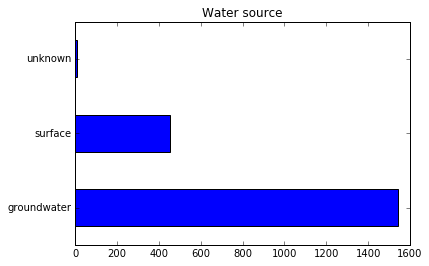

In [10]:
trainData.source_class.value_counts().plot(kind="barh",title="Water source")

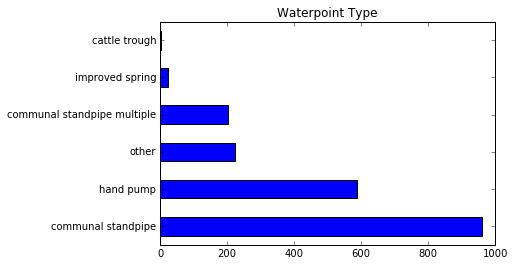

In [11]:
trainData.waterpoint_type.value_counts().plot(kind="barh",title="Waterpoint Type")

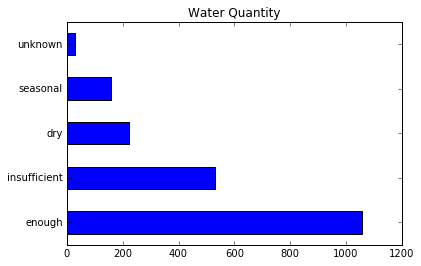

In [12]:
trainData.quantity.value_counts().plot(kind="barh",title="Water Quantity")

In [13]:
X = pd.DataFrame()
for column in categorical_columns:
    X[column]=trainData[column]

X["status_group"]=trainData["status_group"]

In [14]:
# We will pop out the output column and treat it as y.
y = X.pop("status_group")
y= pd.get_dummies(y == 'functional')# == 'functional'

In [15]:
for variable in categorical_columns:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [16]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Now we will try to find Best Random Forest Classifier using GridSearch

In [17]:
rfc = RandomForestClassifier(n_jobs=-1)
hyperparameters={'max_depth':[None,10,5],'max_features':['auto','log2','sqrt'],
                 'min_samples_split':[1,2,3],'criterion':['entropy','gini'],'n_estimators':[100,200,300],
                'min_samples_leaf':[2]}
estimator = GridSearchCV(rfc,hyperparameters, cv=None, n_jobs=-1)

In [18]:
estimator.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [2], 'n_estimators': [100, 200, 300], 'min_samples_split': [1, 2, 3], 'criterion': ['entropy', 'gini'], 'max_features': ['auto', 'log2', 'sqrt'], 'max_depth': [None, 10, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
estimator.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
best_rfc = estimator.best_estimator_

In [21]:
y_pred = best_rfc.predict(X_test)

In [22]:
roc = roc_auc_score(y_test, y_pred)
print "AUC Score: ", roc

AUC Score:  0.737126860988


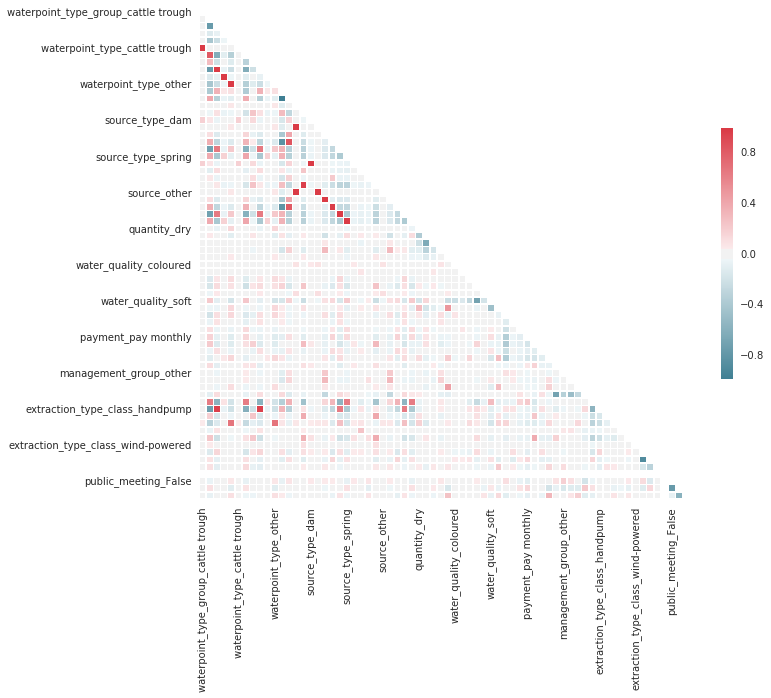

In [39]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Inference : 
<li> We are successfully able to predict the functional and non functional pumps.
<li> Using GridSearch, we are able to get best Random Forest Classifier with ROC AUC score of 0.73.
<li> Heat Map gave fair idea about the data.